# TA Review Session - 4
## Linear Algebra, Regression and Data Analysis in Python
### FINM September Launch

Maneet Singh - TA

maneetsingh@uchicago.edu

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

In [2]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## Data
- We use the file, “inflation_data.xlsx”.
- Find the data in the Github repo associated with the module, (link on Canvas.)


The data file contains...

- Macroeconomic Data
    
    - Core CPI price index, denoted as p.
    
    - M2 Money Supply, denoted as m.

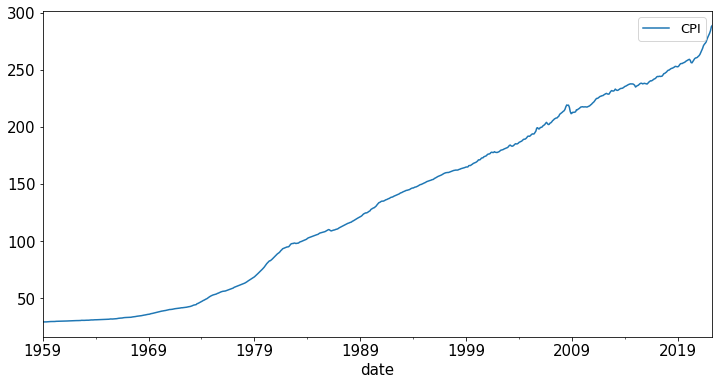

In [3]:
inflation_data = pd.read_excel('inflation_data.xlsx').set_index('date')
inflation_data[['CPI']].plot()
plt.show()

## Application of OLS: Time Series Forecasting

### 1. Autoregressive Models: $AR(p)$

An AR(1) refers to a model where the dependent variable depends on a single lag:


$$y_t = \alpha + \sum_{i = 1}^p\rho_i y_{t−i} + \epsilon_t$$


$$corr (y_{t−1},\epsilon_t) = 0$$


This follows the form of our usual linear model,

$$
y = β_0 + β_1x + \epsilon
$$

- In the context of time-series forecasting, autoregressive modeling will mean creating the model where the response variable Y will depend upon the previous values of Y at a pre-determined constant time lag

- AR models can be used to model anything that has some degree of autocorrelation which means that there is a correlation between observations at adjacent time steps.

The AR(1) model implies...
- Correlations follow
$$
corr (y_t, y_{t−k}) = \rho k
$$

- Conditional mean is

$$
E_t[y_{t+1}] = \alpha + \rho y_t
$$

where $E_t$ denotes an expectation conditional on time-t data.


Unconditional mean and variance are
$$
E[y] = \frac{α}{1− \rho}
$$

$$
var (y) = \frac{σ^2_{\epsilon}}{1 − \rho}
$$

In [4]:
cpi = inflation_data[['CPI']][1:]
cpi_lag = inflation_data[['CPI']].shift().dropna()

X = sm.add_constant(cpi_lag)
y = cpi

ar_model = sm.OLS(exog = X, endog = y).fit() 
print(ar_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.197e+07
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:40:38   Log-Likelihood:                -482.16
No. Observations:                 759   AIC:                             968.3
Df Residuals:                     757   BIC:                             977.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1430      0.033      4.377      0.0

In [5]:
# Out-of-sample tests:
X_train = X.loc[:'2010']
y_train = y.loc[:'2010']

X_test = X.loc['2011':]
y_test = y.loc['2011':]

ar_model_test = LinearRegression().fit(X, y)
print('In sample: {:,.2%}'.format(ar_model_test.score(X_train, y_train)))
print('Out-of-sample: {:,.2%}'.format(ar_model_test.score(X_test, y_test)))

In sample: 100.00%
Out-of-sample: 99.79%


### 2. Stationarity

A time-series is said to be stationary if...


- $E(y_t)$ is independent of t


- $var(y_t)$ is a finite, positive constant, independent of t .


- $cov(y_t,y_{t−k})$ is a finite function of k — not a function of t .


- An AR(1) process is stationary if $|\rho| < 1$.


Processes that make a time series non-stationary:


- Random Walk:

$$
y_t = y_{t-1} + \epsilon_t
$$


- Random Walk with a drift:

$$
y_t = \mu + y_{t-1} + \epsilon_t
$$

- Trend-Stationary Process:

$$
y_t = \mu + \beta t + \epsilon_t
$$

While OLS is commonly used, it can be problematic.

- The exogeneity assumption does not hold. The regressor, $y_{t−1}$, is correlated with past errors, $\epsilon_{t−1}$


- OLS will be biased.


- OLS standard errors will be wrong.

Still, OLS will often be consistent and we can use robust standard errors to get correct inference.

**ACF & PACF plot**

**Auto-correlation Function**: Plots the correlation upto $i^{th}$ lag

**Partial Auto-correlation Function**: Plots the correlation for $i^{th}$ lag

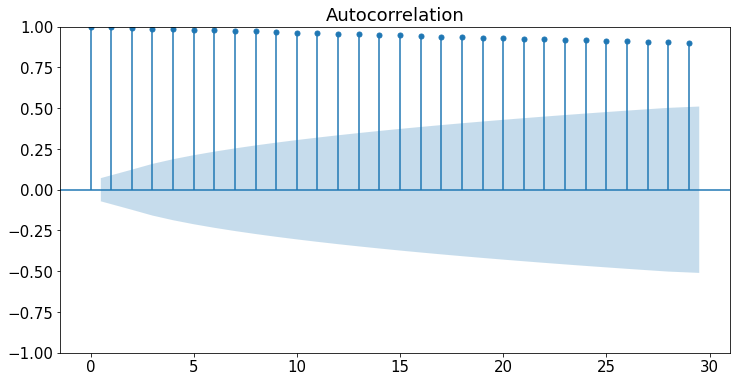

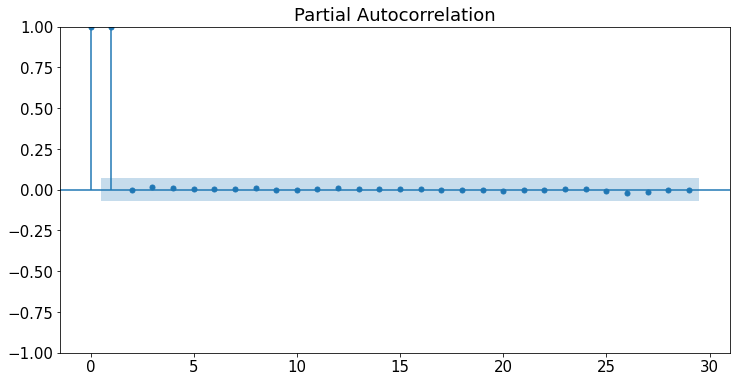

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

plot_acf(cpi)
plt.show()

plot_pacf(cpi)
plt.show()

### 3. Stationarity Tests

**Augmented Dickey Fuller Test**

An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. 

In [7]:
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [8]:
print('ADF Test P-Value: {:,.2%}'.format(adfuller(cpi)[1]))

ADF Test P-Value: 99.86%


Looking at p-value, we cannot reject the null hypothesis that the unit root is present

**KPSS Test**


- KPSS tests the stationarity of a time-series around a deterministic trend 


- A key difference from ADF test is the null hypothesis of the KPSS test is that the series is stationary.

In [9]:
from statsmodels.tsa.stattools import kpss

import warnings
warnings.filterwarnings('ignore')

In [10]:
print('KPSS Test P-Value: {:,.2%}'.format(kpss(cpi)[1]))

KPSS Test P-Value: 1.00%


Regressions using data with trends can give to spurious results.


- Two series with trends may show strongly significant regression results just due to the underlying trend in both.


- For instance, two completely independent random walks with drift may seem highly correlated.


- Even worse, random walks without trends will lead to spurious regression.

### How to make a time-series stationary

**1. Differencing: For a time-series without trend**

$$
y_t - y_{t-1} = \mu + \epsilon_t
$$

In [11]:
cpi_diff = cpi.diff().dropna()
print('ADF Test P-Value: {:,.2%}'.format(adfuller(cpi_diff)[1]))
print('KPSS Test P-Value: {:,.2%}'.format(kpss(cpi_diff)[1]))

ADF Test P-Value: 13.51%
KPSS Test P-Value: 1.00%


**2. Detrending: For a time-series with trend**

In [12]:
cpi_diff2 = cpi_diff.diff().dropna()
print('ADF Test P-Value: {:,.2%}'.format(adfuller(cpi_diff2)[1]))
print('KPSS Test P-Value: {:,.2%}'.format(kpss(cpi_diff2)[1]))

ADF Test P-Value: 0.00%
KPSS Test P-Value: 10.00%


There are many methods to de-trend a series, some of which are beyond the scope of what we can cover.

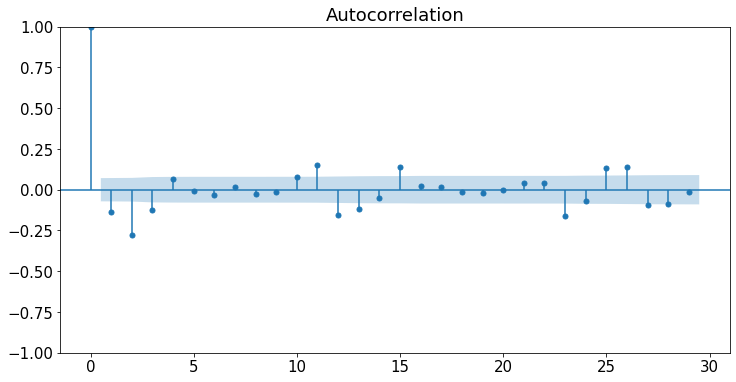

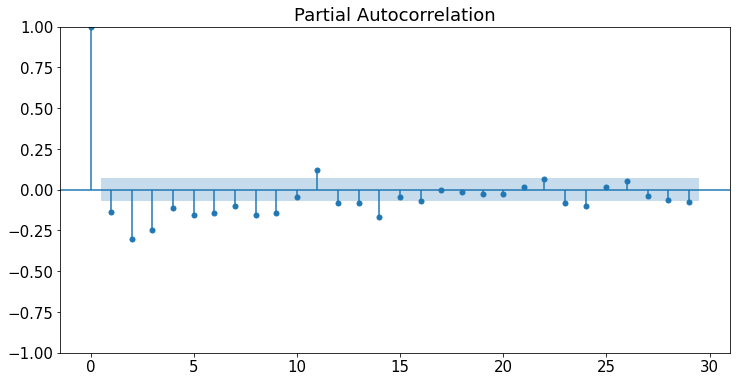

In [13]:
plot_acf(cpi_diff2)
plt.show()

plot_pacf(cpi_diff2)
plt.show()

## Application of OLS: Volatility Modeling

In [54]:
spy = pd.read_excel('sp500_returns.xlsx', sheet_name='benchmark rets').set_index('date')[['SPY']]
display(spy.head())
display(spy.tail())

,SPY
date,
2016-01-15,-0.021430
2016-01-22,0.014429
2016-01-29,0.016800
2016-02-05,-0.029789
2016-02-12,-0.007023


,SPY
date,
2022-05-13,-0.023387
2022-05-20,-0.030096
2022-05-27,0.065780
2022-06-03,-0.011366
2022-06-10,-0.050519


**h-period Returns**


$$
r_t = \frac{P_t - P_{t-h}}{P_{t-h}}
$$

In case of Dividends

$$
r_t = \frac{P_t - P_{t-h} + D_{t, t-h}}{P_{t-h}}
$$

**h-period Cumulative Returns**
$$
R_t = (1 + r_1)(1 + r_2)...(1 + r_t) - 1
$$

$$
R_t = \prod_{i=1}^t (1+ r_i) - 1
$$

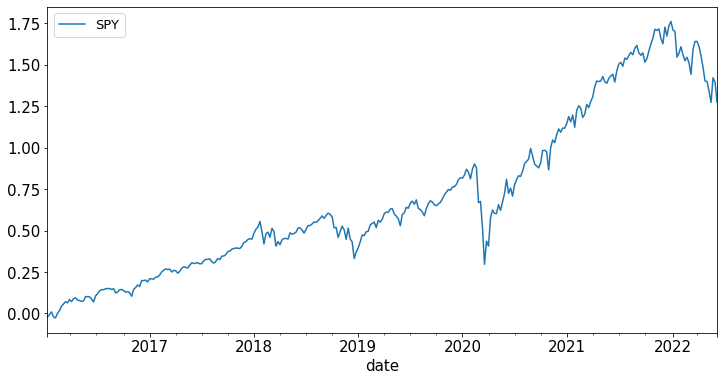

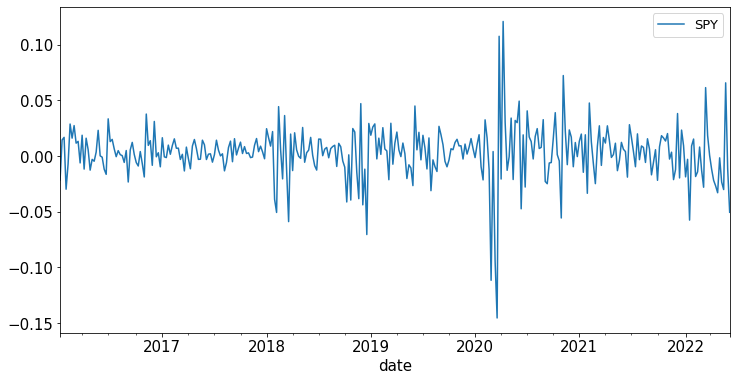

In [55]:
cum_rets_spy = (1 + spy).cumprod() - 1
cum_rets_spy.plot()
plt.show()
spy.plot()
plt.show()

### 1. Expanding Series

$$\begin{align*}
\sigma^2_{t} =& \frac{1}{t-1}\sum_{\tau=1}^{t-1} r_\tau ^ 2
\end{align*}$$

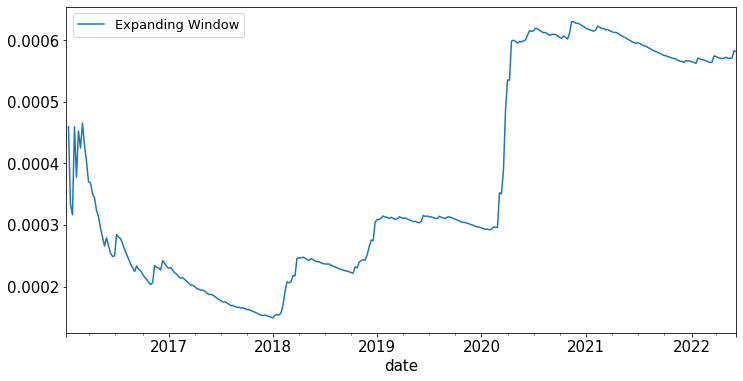

In [56]:
### Expanding Window
var = (spy**2).shift(1).expanding().mean().rename(columns={'SPY':'Expanding Window'})
var.plot()
plt.show()

### 2. Rolling Window

\begin{align*}
\sigma^2_{t} =& \frac{1}{m}\sum_{l=1}^{m} r_{t-l}^2
\end{align*}

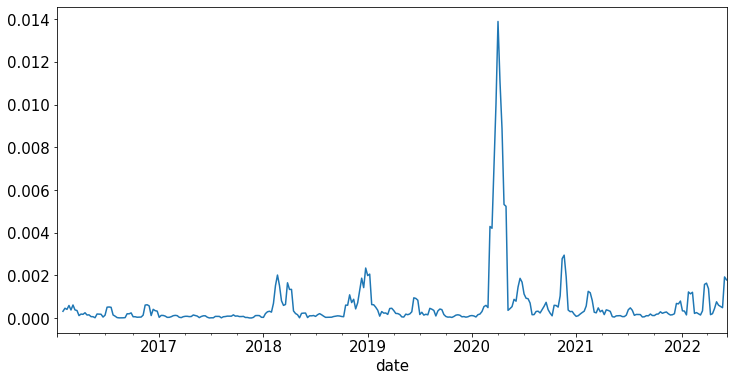

In [57]:
### Rolling Window
var['Rolling Window'] = (spy**2).shift(1).rolling(3).mean() 
var['Rolling Window'].plot()
plt.show()

### 3. Exponential Weighted Moving Average

$$\begin{align*}
\sigma^2_{t} =& \theta \sigma^2_{t-1} + (1-\theta) r_{t-1}^2
\end{align*}$$

In [66]:
from arch import arch_model
from arch.univariate import EWMAVariance

In [73]:
var_1 = (0.15 * (1 / (12**0.5)))**2
theta = 0.2

In [74]:
var[['IGARCH']] = None

### Initialize with the given parameter
var.iloc[0,2] = var_1

for i in range(1, len(var)):
    var['IGARCH'].iloc[i] = var['IGARCH'].iloc[i-1] * theta + (1-theta)*(spy.iloc[i-1,0]**2)

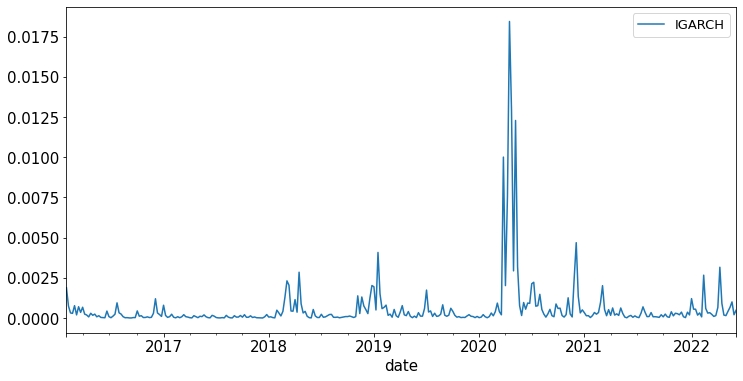

In [75]:
var[['IGARCH']].plot()
plt.show()

### 4. GARCH (Generalized Autoregressive conditional heteroskedasticity)

The GARCH model generalizes the ARCH model by includinglagged values of variance in the equation describing how variance evolves:

$$\begin{align*}
\sigma^2_{t} =& \omega + \alpha \sigma^2_{t-1} + \beta r_{t-1}^2
\end{align*}$$

In [62]:
from arch import arch_model
from arch.univariate import GARCH

In [63]:
GARCH = arch_model(spy, vol='Garch', p=1, o=0, q=1, dist='Normal')

GARCH_model = GARCH.fit()

GARCH_model.params

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3133547042.02871
Iteration:      2,   Func. Count:     18,   Neg. LLF: 28760686.585726164
Iteration:      3,   Func. Count:     31,   Neg. LLF: 15384.773119630587
Iteration:      4,   Func. Count:     42,   Neg. LLF: 468.64938472044815
Iteration:      5,   Func. Count:     52,   Neg. LLF: 894.8837403773782
Iteration:      6,   Func. Count:     61,   Neg. LLF: -796.0283705278885
Iteration:      7,   Func. Count:     67,   Neg. LLF: -702.1522236914784
Iteration:      8,   Func. Count:     74,   Neg. LLF: -854.4414965189137
Iteration:      9,   Func. Count:     80,   Neg. LLF: -856.7561416818055
Iteration:     10,   Func. Count:     85,   Neg. LLF: -856.7788547222042
Iteration:     11,   Func. Count:     90,   Neg. LLF: -856.7932419064629
Iteration:     12,   Func. Count:     95,   Neg. LLF: -856.7939126783165
Iteration:     13,   Func. Count:    100,   Neg. LLF: -856.7939327389884
Iteration:     14,   Func. Count:    104,   Neg. LLF: 

mu          0.003898
omega       0.000030
alpha[1]    0.406102
beta[1]     0.593898
Name: params, dtype: float64

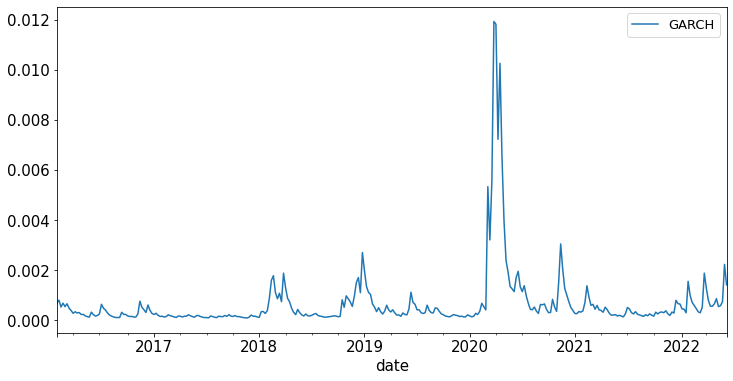

In [64]:
var[['GARCH']] = None

### Initialize with the given parameter
var.iloc[0,3] = var_1 

for i in range(1, len(var)):
    var['GARCH'].iloc[i] = GARCH_model.params['omega'] + var['GARCH'].iloc[i-1] * GARCH_model.params['beta[1]'] + GARCH_model.params['alpha[1]']*(spy.iloc[i-1,0]**2)
    
var = var.dropna()

var[['GARCH']].plot()
plt.show()

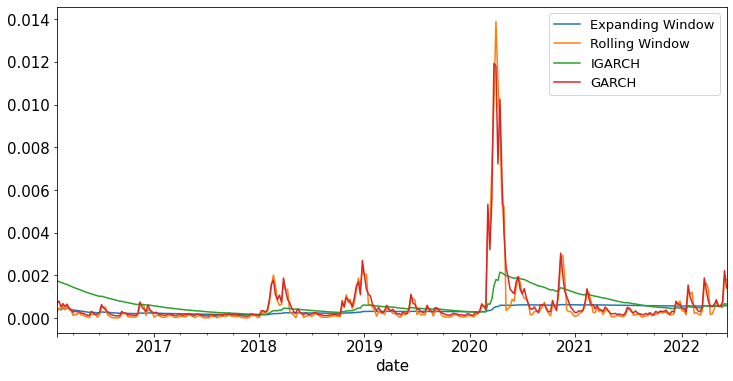

In [65]:
var.plot()
plt.show()